# Furijeove transformacije jednostavnih slika

Sledeći primeri ilustruju kako izgledaju Furijeove transformacije nekih jednostavnih slika koje sadrže horizontalne, vertikalne ili dijagonalne linije.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from PIL import Image

Pre nego li iscrtamo spektre ovih funkcija, podsetimo se značenja `DC faktora` (engl. DC term) tj. nultog koeficijenta diskretne Furijeove transformacije.

Konstruisaćemo proizvoljnu sliku (matricu slučajnih vrednosti) dimenzije 32x32 piksela, a potom odrediti njenu diskretnu Furijeovu transformaciju.

In [3]:
np.random.seed(1234)

In [4]:
random_image = np.random.random_sample((32, 32))

In [5]:
c = np.fft.fft2(random_image)

In [6]:
DC_term = c[0][0]
print('DC faktor: ', DC_term)

DC faktor:  (519.2728925248169+0j)


In [7]:
sum_of_the_input_signal = np.sum(random_image)

In [8]:
print('Suma vrednosti ulaznog signala: ', sum_of_the_input_signal)

Suma vrednosti ulaznog signala:  519.2728925248169


Kao što možemo videti, DC faktor je jednak sumi vrednosti ulaznog signala.

Dalje, napisaćemo funkciju koja će prikazivati uporedo zadatu sliku i njen Furijeov spektar. 

In [9]:
def show_spectar(image):
    c = np.fft.fft2(image)
    c_shifted = np.fft.fftshift(c)  
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
    
    ax1.imshow(image, cmap='gray')
    ax1.axis('off')
    ax1.set_title('Originalna slika')
    
    # alternativna skala za prikaz     
    # ax2.imshow(np.log(np.abs(c_shifted)+1), cmap='gray')
    ax2.imshow(np.abs(c_shifted), cmap='gray')

    ax2.axis('off')
    ax2.set_title('Spektar')
    
    plt.show()

## Prikaz vertikalnih linija

In [10]:
vertical_lines = Image.open('data/vertikalne_linije.gif')

In [11]:
vertical_lines.size

(256, 256)

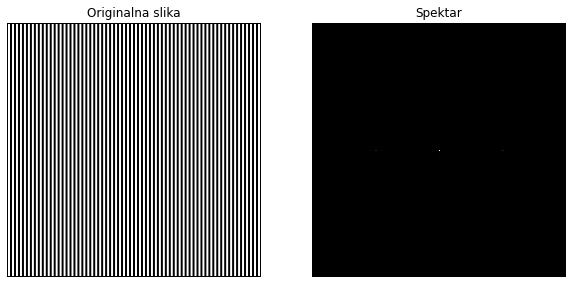

In [12]:
show_spectar(vertical_lines)

Spektar sadrži samo centralnu frekvenciju i dve simetrične frekvencije duž horizontale koja polovi kvadrat.

## Prikaz horizontalnih linija

In [13]:
horizontal_lines = vertical_lines.rotate(angle=90)

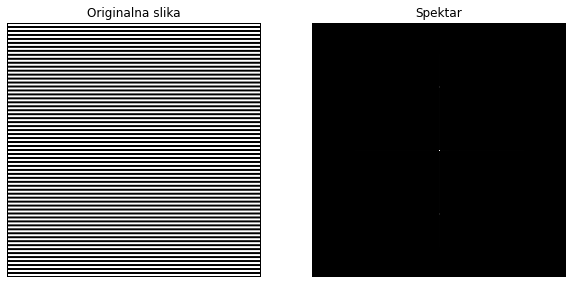

In [14]:
show_spectar(horizontal_lines)

Ovaj spektar sadrži samo centralnu frekvenciju i dve simetrične frekvencije duž vertikale koja polovi kvadrat. Možemo primetiti da je, takođe, zarotiran za 90 stepeni u odnosu na prethodni spektar. 

## Prikaz dijagonalnih linija

In [15]:
diagonals = Image.open('data/dijagonalne_linije.gif')

In [16]:
diagonals.size

(256, 256)

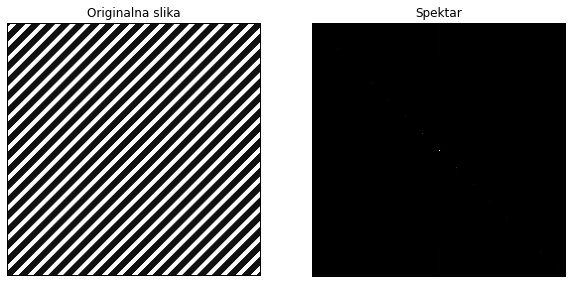

In [17]:
show_spectar(diagonals)

Spektar ove slike sadrži duž glavne dijagonale nekoliko frekvencija skoncentrisanih oko centra.

## Prikaz kućice

In [18]:
house = Image.open('data/house.gif')

In [19]:
house.size

(256, 256)

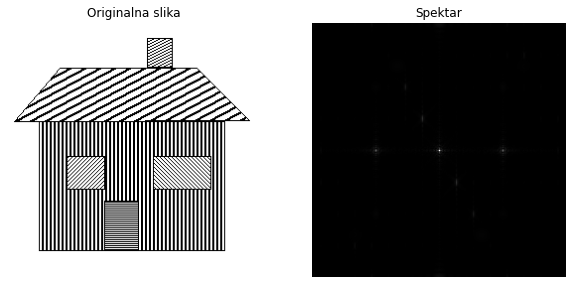

In [20]:
show_spectar(house)

Kako je ova slika kombinuje prethodno pomenute jednostavne slike, vidimo da i njen frekvencijski spektar predstavlja kombinaciju pomenutih spektara.

## Zadaci za vežbu

1. Pronađite sliku kružnice (ili je nacrtajte), a potom ispitajte kako izgleda njena Furijeova transformacija.

2. Oprobajte se i sa iscrtavanjem horizontalnih i vertikalnih pravougaonika. 